<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

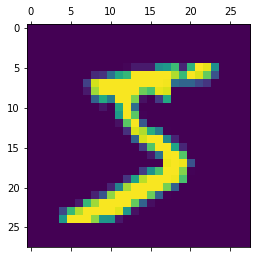

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [6]:
#scale data into 0-1
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [9]:
X_train_flattened.shape

(60000, 784)

In [10]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 268us/step - accuracy: 0.8110 - loss: 0.7222
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 283us/step - accuracy: 0.9141 - loss: 0.3059
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 276us/step - accuracy: 0.9219 - loss: 0.2825
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 272us/step - accuracy: 0.9255 - loss: 0.2719
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 270us/step - accuracy: 0.9252 - loss: 0.2635


In [12]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.9147 - loss: 0.3029


[0.26737526059150696, 0.9261000156402588]

In [13]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step


array([1.4805954e-02, 3.6297004e-07, 4.1436687e-02, 9.5892596e-01,
       2.5559063e-03, 1.1272902e-01, 1.4718860e-06, 9.9965882e-01,
       9.1942847e-02, 6.5082639e-01], dtype=float32)

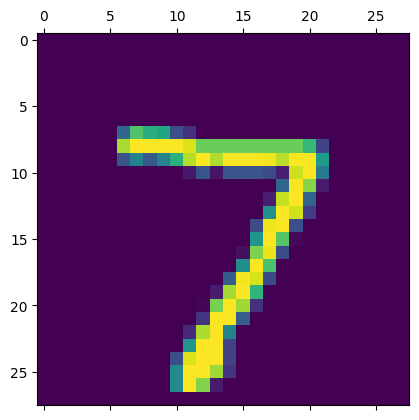

In [14]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [17]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [52]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    5,   10,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,    7,  929,   11,    5,    4,   15,    8,   42,    4],
       [   3,    0,   23,  910,    0,   27,    6,   11,   23,    7],
       [   1,    1,    2,    1,  915,    0,   16,    4,   10,   32],
       [  11,    2,    2,   27,    9,  773,   23,    4,   33,    8],
       [   7,    3,    5,    1,    7,    7,  925,    2,    1,    0],
       [   1,    6,   25,    5,    8,    0,    0,  941,    2,   40],
       [   7,    5,    7,   18,    9,   22,   11,    8,  880,    7],
       [  11,    7,    1,   10,   32,    6,    0,   18,    9,  915]])>

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

NameError: name 'cm' is not defined

<Figure size 1000x700 with 0 Axes>

<h3 style='color:purple'>Using hidden layer</h3>

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


/Users/mac/Desktop/DE_PJ/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.8701 - loss: 0.4534
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.9609 - loss: 0.1325
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 0.9754 - loss: 0.0862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.9804 - loss: 0.0646
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.9849 - loss: 0.0502


In [21]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9701 - loss: 0.0956


[0.0833396315574646, 0.9733999967575073]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step


Text(95.72222222222221, 0.5, 'Truth')

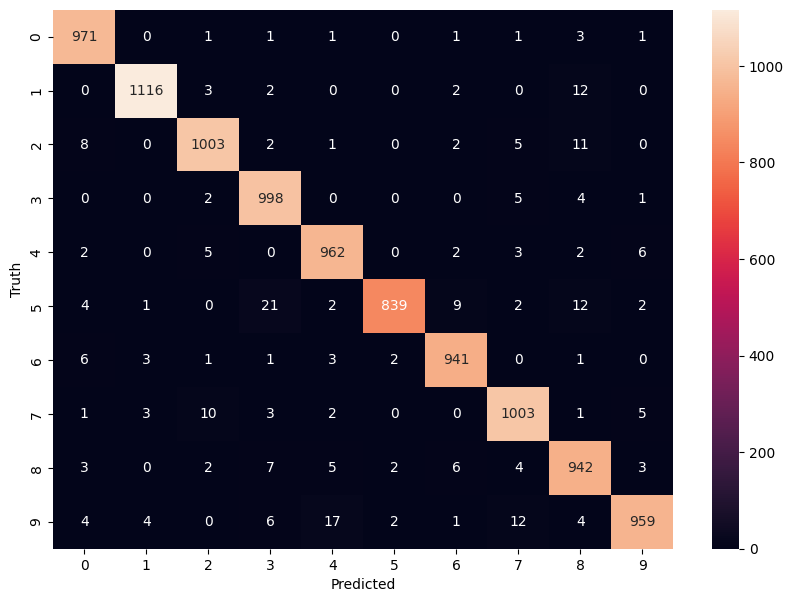

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


/Users/mac/Desktop/DE_PJ/env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.8744 - loss: 0.4509
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.9614 - loss: 0.1305
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.9747 - loss: 0.0846
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.9812 - loss: 0.0632
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.9852 - loss: 0.0486
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.9874 - loss: 0.0396
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.9905 - loss: 0.0317
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.9930 - loss: 0.0238
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.9925 - loss: 0.0229
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.9947 - loss: 0.0190


In [25]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.9718 - loss: 0.1025  


[0.08871757984161377, 0.9763000011444092]

In [27]:
model = keras.Sequential([
    
    keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
 
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

/Users/mac/Desktop/DE_PJ/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9090 - loss: 0.3069
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9831 - loss: 0.0550
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9887 - loss: 0.0367
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9933 - loss: 0.0225
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9954 - loss: 0.0160
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9970 - loss: 0.0102
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9967 - loss: 0.0100
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9975 - loss: 0.0078
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9982 - loss: 0.0051
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9985 - loss: 0.0045
